In [1]:
%matplotlib inline
import numpy
import pylab
pylab.rcParams['figure.figsize'] = 10, 6
import math

lifetimes=numpy.arange(1,11)
improvements=numpy.arange(0,0.3,0.05)
nYears=25

print lifetimes
print improvements

[ 1  2  3  4  5  6  7  8  9 10]
[ 0.    0.05  0.1   0.15  0.2   0.25]


In [2]:
import numpy

resources=numpy.zeros( (len(lifetimes),len(improvements),nYears))
d2=numpy.vander(1+improvements,nYears,increasing=True)
de2=numpy.cumsum(d2,axis=1)

for i,lt in enumerate(lifetimes):
    de2sub=numpy.append(numpy.zeros((len(improvements),lt)),de2,axis=1)
    resources[i]=de2-de2sub[:,0:nYears]
    


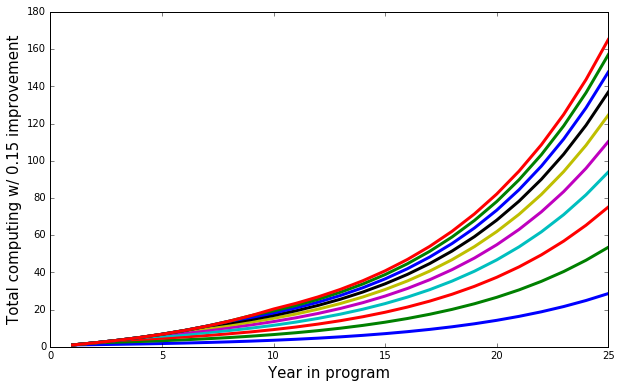

In [3]:
pylab.figure(1)
interestingImprovement = 3
for lt in range(len(lifetimes)):
#    i=lt*len(improvements) + interestingImprovement
    pylab.plot(range(1,nYears+1),resources[lt][interestingImprovement],linewidth=3)
    
pylab.xlabel('Year in program',fontsize=15)
pylab.ylabel('Total computing w/ '+str(improvements[interestingImprovement])+' improvement',fontsize=15)
    

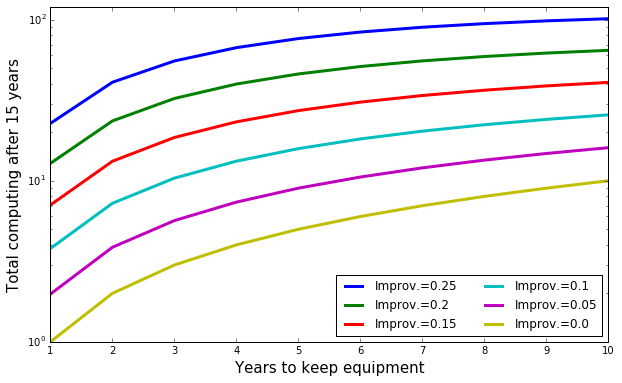

In [4]:
pylab.figure(2)
interestingYear = 15
for im in reversed(range(len(improvements))):
    data=numpy.zeros(len(lifetimes))
    for lt in range(len(lifetimes)):
        #i=lt*len(improvements) + im
        data[lt]=resources[lt][im][interestingYear-1]
    pylab.semilogy(lifetimes,data,linewidth=3,label='Improv.='+str(improvements[im]))

pylab.xlabel('Years to keep equipment',fontsize=15)
pylab.ylabel('Total computing after '+str(interestingYear)+' years',fontsize=15)
pylab.ylim(ymax=120.)
pylab.legend(loc='best',ncol=2)    

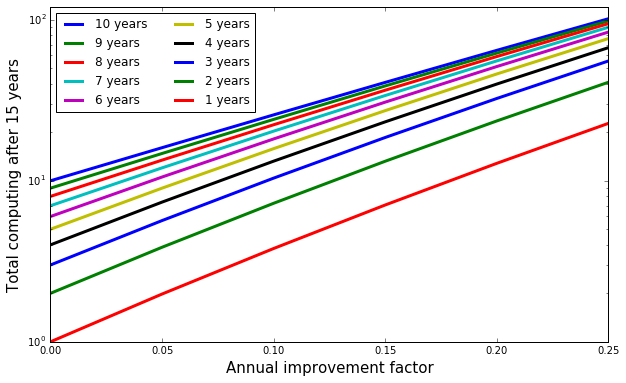

In [5]:
pylab.figure(3)
interestingYear = 15
for lt in reversed(range(len(lifetimes))):
    data=numpy.zeros(len(improvements))
    for im in range(len(improvements)):
        #i=lt*len(improvements) + im
        data[im]=resources[lt][im][interestingYear-1]
    pylab.semilogy(improvements,data,linewidth=3,label=str(lifetimes[lt])+' years')

pylab.xlabel('Annual improvement factor',fontsize=15)
pylab.ylabel('Total computing after '+str(interestingYear)+' years',fontsize=15)
pylab.ylim(ymax=120.)
pylab.legend(loc='best',ncol=2)    